# 7.1 Data 어떻게 표현하면 좋을까? 베열(array)과 표(table)

**학습 목표**

- 데이터를 배열로 저장하는 것에 대해 이해하고 list, NumPy의 사용법을 학습합니다.

- 구조화된 데이터를 저장하는 것을 이해하고 dictonary와 Pandas 사용법을 학습합니다.


- 이미지 데이터를 NumPy 배열로 저장하는 것을 이해하고 그 사용법을 학습합니다.

- 학습한 자료 구조를 활용해서 통계 데이터를 어떻게 계산하는지 학습합니다.

### 목차

- **배열은 가까이에~ 기본 통계 데이터를 계산해 볼까?**

1. 평균 계산하기
2. 배열을 활용한 평균, 표준편차, 중앙값 계산

<br>

- **끝판왕 등장! NumPy로 이 모든 걸 한방에!**

1. NumPy 소개
2. NumPy 주요기능
3. NumPy로 기본 통계 데이터 계산해 보기

<br>

- **데이터의 행렬 변환**

1. 데이터의 행렬 변환
2. 이미지의 행렬 변환

<br>

- **구조화된 데이터란?**

1. 구조화된 데이터란?

<br>

- **구조화된 데이터와 Pandas**

1. Series
2. DataFrame

<br>

- **Pandas와 함께 EDA 시작하기**

---


# 7-2. 배열은 가까이에~ 기본 통계 데이터를 계산해 볼까? (1) 평균 계산하기

**사용자가 입력한 숫자들을 배열로 만들기**

>배열에 대해 생각해 보기 전에, 간단한 예로 숫자로 구성된 데이터부터 시작해
봅시다.

**평균 계산하기**

1. 평균은 숫자들의 합을 총 숫자의 개수로 나눈 값이죠. 일단 숫자들의
합을 total , 숫자의 개수는 count로 변수명을 정하고 0으로 초깃값을 할당합니다.


2. 사용자가 입력하는 숫자는 input 함수를 사용해 받습니다. 숫자를 입력하지 않으면 종료합니다.


3. while 문으로 조건 지정 반복문을 설정합니다. 숫자를 입력하지
않으면 종료한다고 했으니, 조건은 input함수에서 받은 값이 ""이
되면 False가 되어서 while 문을 빠져나오게 코딩하면 되겠네요.

4. while 문의 조건이 True면 count와 total이 갱신됩니다. 반복문이
실행될 때마다 count를 1씩 증가시키기 위해 증감 연산자를 사용하고, total이에는 input으로 받은 숫자를 더해 줍니다.

input함수가 return하는 값의 자료형은 문자열 str이니 float로 타입을 변환해 주는 것 잊지 마세요!


5. 혹시라도 사용자가 숫자가 아닌 엉뚱한 문자열을 입력하면 어떻게 할까요? 사용자로부터 숫자가 아닌 것을 입력받을 때는 예외 처리를
해줍시다.

In [ ]:
total = 0
count = 0
numbers = input("Enter a number : (<Enter Key> to quit)")
while numbers != "":
    try:
        x = float(numbers)
        count += 1
        total = total + x
    except ValueError:
        print('NOT a number! Ignored..')
    numbers = input("Enter a number : (<Enter Key> to quit)")

avg = total / count
print("\n average is", avg)

Enter a number : (<Enter Key> to quit)3
Enter a number : (<Enter Key> to quit)45
Enter a number : (<Enter Key> to quit)122
Enter a number : (<Enter Key> to quit)1324
Enter a number : (<Enter Key> to quit)

 average is 373.5


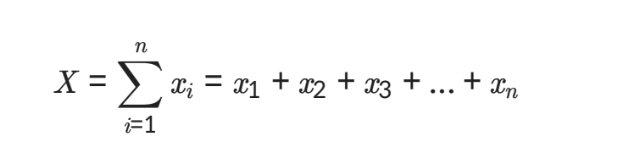

# 7-3. 배열은 가까이에~ 기본 통계 데이터를 계산해 볼까? (2) 배열을 활용한 평균, 표준편차, 중앙값 계산

**1) 배열의 의미**

우리는 리스트가 순서를 가진 요소(element)의 배열이란 것을 알고 있습니다.

x1 x2 x3 xn을 통째로 X라는 변수에
순서대로 저장하는 것입니다. 아래는 수학적 표기법이에요.



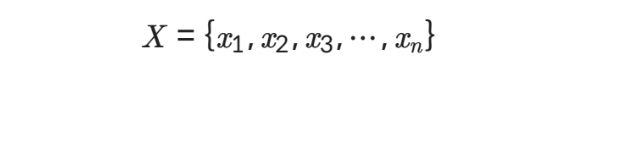

**2) 사용자가 입력한 숫자들을 배열로 만들기**

>사용자의 입력으로 받은 숫자를 배열로 표현해 보겠습니다. 배열을 표현하기 위해서 파이썬의
기본 컨테이너 자료형인 리스트(list) 를 사용하겠습니다.

In [ ]:
# 2개 이상의 숫자를 입력받아 리스트에 저장하는 함수
def numbers():
    X=[] # X에 빈 리스트를 할당합니다.
    while True:
        number = input("Enter a number (<Enter key> to quit)")
        while number !="":
            try:
                x = float(number)
                X.append(x) # float형으로 변환한 숫자 입력을 리스트에 추가합니다.
            except ValueError:
                print('>>> NOT a number! Ignored..')    
            number = input("Enter a number (<Enter key> to quit)")
        if len(X) > 1: # 저장된 숫자가 2개 이상일 때만 리턴합니다.
            return X
X=numbers()
print('X :', X)

Enter a number (<Enter key> to quit)123
Enter a number (<Enter key> to quit)
Enter a number (<Enter key> to quit)12
Enter a number (<Enter key> to quit)
X : [123.0, 12.0]


**동적배열**

>다른 언어에서는 배열은 크기를 정해 놓아야 하는 경우가 많습니다. 대표적으로 C언어가 배열 변수를
만들 때 처음에 원소가 몇 개 들어갈 수 있다고 정해놓아야 합니다. 그러나 파이썬의 리스트는 그렇지
않습니다. 파이썬의 리스트는 임의의 데이터 타입을 담을 수 있는 가변적 연속열(Sequence)형입니다.

In [ ]:
"""
list는 별도의 import가 필요없지만 array를 사용하기 위해서는 해주어야 합니다.
파이썬에서 array는 built-in이 아닙니다.
"""


import array as arr

"""
list 안의 element 사이에 됩니다. 숫자로만 이루어진 list에 문자열
element를 추가할 수 있습니다. 그러나 array는 처음부터 element의 유형을 지정해서
생성하며, 지정되지 않은 다른 타입의 element 추가가 허용되지 않습니다. 이러한 array의
특성은 다음에 나오는 NumPy에도 동일하게 적용됩니다.
"""


mylist = [1, 2, 3] # 이것은 파이썬 built-in list입니다.
print(type(mylist))

mylist.append('4') # mylist의 끝에 character '4'를 추가합니다.
print(mylist)

mylist.insert(1, 5) # mylist의 두번째 자리에 5를 끼워넣습니다.
print(mylist)

myarray = arr.array('i', [1, 2, 3]) # 이것은 array입니다. import array를 해야 쓸 수 있습니
print(type(myarray))
# 아래 라인의 주석을 풀고 실행하면 에러가 납니다.
#myarray.append('4') # myarray의 끝에 character '4'를 추가합니다.

print(myarray)
myarray.insert(1, 5) # myarray의 두번째

<class 'list'>
[1, 2, 3, '4']
[1, 5, 2, 3, '4']
<class 'array.array'>
array('i', [1, 2, 3])


**리스트를 활용한 시그마의 표현**

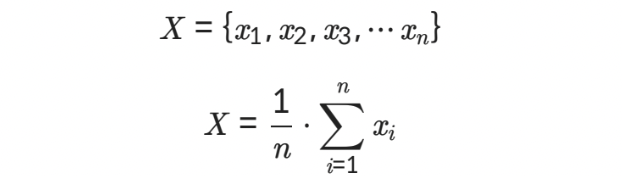

In [ ]:
"""
시그마를 배열을 통해 계산하려면 for문을 사용해야 합니다. 리스트는 원소의 값과
순서를 알고 있으니까요.
"""

total = 0.0
for i in range(len(X)):
    total = total + X[i]
mean = total / len(X)

print('sum of X: ', total)

sum of X:  135.0


**중앙값**

>중앙값(median)은 주어진 숫자를 크기 순서대로 배치할 때 가장 중앙에 위치하는 숫자입니다.
중앙이라는 위치는 그 숫자의 총합이 홀수이냐 짝수이냐에 따라 달라집니다. 

In [ ]:

"""
nums 는 중앙값을 구할 리스트를 지정하는 매개변수입니다.
리스트를 오름차순으로 정렬하기 위해 sort()를 사용하였고, 리스트의 개수가 홀수일 때와 짝수일 때의
경우를 if 와 else 구문을 이용해 구현합니다.
홀짝 판별은 나머지 연산자인 로 2로 나눌 때의 값이 0이면 짝수, 0이 아니라면 홀수로 나누는
방식으로 구현할 수 있습니다.


만약 짝수 개의 리스트라면, 리스트 길이의 절반을 기준으로 나뉘는 pr과 pl
 을 기준 인덱스로하여
해당하는 두 값을 구합니다. 이 때 두 값의 평균이 중앙값이 됩니다.


만약 홀수 개의 리스트라면, 인덱스로 //(몫 연산자)를 사용해서 길이를 2로 나누어 사용합니다. 이때,
인덱스의 위치에 저장된 값이 중앙값이 됩니다.

"""
def median(nums): # nums : 리스트를 지정하는 매개변수
    nums.sort() # sort()로 리스트를 순서대로 정렬
    size = len(nums)    
    p = size // 2
    if size % 2 == 0: # 리스트의 개수가 짝수일때
        pr = p # 4번째 값
        pl = p-1 # 3번째 값
        mid= float((nums[pl]+nums[pr])/2)
    else: # 리스트의 개수가 홀수일때
        mid = nums[p]
    return mid

print('X :', X)
median(X) # 매개변수의 값으로 X를 사용함

X : [123.0, 12.0]


67.5

**표준편차와 평균**

In [ ]:
def means(nums):
    total = 0.0
    for i in range(len(nums)):
        total = total + nums[i]
    return total / len(nums)

means(X)

67.5

중앙값과 동일하게 매개변수 nums은 리스트를 받고. 평균은 리스트의 합을 배열의 총 길이로 나눠주면
됩니다.

In [ ]:
avg = means(X)
def std_dev(nums, avg):
    texp = 0.0
    for i in range(len(nums)):
        texp = texp + (nums[i] - avg)**2 # 각 숫자와 평균값의 차이의 제곱을 계속 더한 후
    return (texp/(len(nums)-1)) ** 0.5 # 그 총합을 숫자개수-1로 나눈 값의 제곱근을 리턴합니
std_dev(X,avg)

78.48885271170677

**전체 코드:main()함수**

In [ ]:
med = median(X)
avg = means(X)
std = std_dev(X, avg)
print("당신이 입력한 숫자{}의 ".format(X))
print("중앙값은{}, 평균은{}, 표준편차는{}입니다.".format(med, avg, std))

당신이 입력한 숫자[12.0, 123.0]의 
중앙값은67.5, 평균은67.5, 표준편차는78.48885271170677입니다.


## Numpy

>NumPy는 Numerical Python의 줄임말로, 과학 계산용 고성능 컴퓨팅과 데이터 분석에 필요한 파이썬 패키지입니다.

<br>


파이썬 기본 패키지 관리자인 pip안에는 NumPy가 없으므로 새로 설치를 하셔야 해요. 

conda를 사용하신다면 기본적으로 포함되어 있기도 하지만 그렇지 않은 경우도 있으니 conda list | grep numpy
로 설치 여부를 먼저
확인해 주세요!

<br>

설치 명령어는 다음과 같습니다.

pip install numpy

https://numpy.org/

- 빠르고 메모리를 효율적으로 사용하여 벡터의 산술 연산과
브로드캐스팅 연산을 지원하는 다차원 배열 ndarray 데이터 타입을 지원한다.


- 반복문을 작성할 필요 없이 전체 데이터 배열에 대해 빠른 연산을 제공하는 다양한 표준 수학 함수를 제공한다.

- 배열 데이터를 디스크에 쓰거나 읽을 수 있다. (즉 파일로 저장한다는 뜻입니다)

- 선형대수, 난수발생기, 푸리에 변환 가능, C/C++ 포트란으로 쓰여진 코드를 통합한다.

### 1) ndarray만들기

우선 NumPy를 사용하기 위해 ndarray객체를 만들어야 합니다. 

ndarray 객체를 이용하면 파이썬에서 사용하는 대규모 데이터 집합을 n차원 배열로 담을 수 있습니다.  ndarray 를 그냥 array라고 부르기도 합니다.

In [ ]:
#ndarray 만들기:ndarray 객체는 arange() 와 array([]) 로 만들 수 있습니다.
import numpy as np
# 아래 A와 B는 결과적으로 같은 ndarray 객체를 생성합니다.
A = np.arange(5)
B = np.array([0,1,2,3,4]) # 파이썬 리스트를 numpy ndarray로 변환
# 하지만 C는 좀 다를 것입니다.
C = np.array([0,1,2,3,'4']) #array이므로 모든 element의 type이 동일해야 합니다.
# D도 A, B와 같은 결과를 내겠지만, B의 방법을 권합니다.
D = np.ndarray((5,), np.int64, np.array([0,1,2,3,4]))
print(A)
print(type(A))
print("--------------------------")
print(B)
print(type(B))
print("--------------------------")
print(C)
print(type(C))
print("--------------------------")
print(D)
print(type(D))

[0 1 2 3 4]
<class 'numpy.ndarray'>
--------------------------
[0 1 2 3 4]
<class 'numpy.ndarray'>
--------------------------
['0' '1' '2' '3' '4']
<class 'numpy.ndarray'>
--------------------------
[0 1 2 3 4]
<class 'numpy.ndarray'>


### 2) 크기(size, shape, ndim)

size, shape, ndim는 각각 행렬 내 원소의 개수, 행렬의 모양, 행렬의 축(axis)의 개수를 의미합니다.

reshape() 메소드는 행렬의 모양을 바꿔줍니다. 주의할 점은 모양을 바꾸기 전후 행렬의 총 원소 개수 (size)가 맞아야 한다는 거에요.

In [ ]:
A = np.arange(10).reshape(2, 5) # 길이 10의 1차원 행렬을 2X5 2차원 행렬로 바꿔봅니다.
print("행렬의 모양:", A.shape)
print("행렬의 축 개수:", A.ndim)
print("행렬 내 원소의 개수:", A.size)

행렬의 모양: (2, 5)
행렬의 축 개수: 2
행렬 내 원소의 개수: 10


**shape**

In [ ]:
"""
원소 10개의 ndarray를 2 X 5행렬로 reshape 해주었습니다.
2X5 행렬은 원소 10개와 행렬의 모양이 맞지만, 
3 X 3으로 reshape하면 모양과 원소의 개수가 맞지 않죠? 
"""
A = np.arange(10)
print('A: ', A)
B = np.arange(10).reshape(2,5)
print('B: ', B)
C = np.arange(10).reshape(3,3) # 이 줄에서 에러가 날 것입니다.
print('C: ', C)

A:  [0 1 2 3 4 5 6 7 8 9]
B:  [[0 1 2 3 4]
 [5 6 7 8 9]]


ValueError: ignored

### 3) type

NumPy 라이브러리 내부의 자료형들은 파이썬 내장함수와 동일합니다. 그러나 살짝 헷갈리는 기능이 있을 수 있어요.

<br>

- NumPy: numpy.array.dtype

- 파이썬: type()

In [ ]:
A= np.arange(6).reshape(2, 3)
print(A)
print(A.dtype)
print(type(A))
print("-------------------------")
B = np.array([0, 1, 2, 3, 4, 5])
print(B)
print(B.dtype)
print(type(B))
print("-------------------------")
C = np.array([0, 1, 2, 3, '4', 5])
print(C)
print(C.dtype)
print(type(C))
print("-------------------------")

"""
파이썬의 최상위 클래스는 바로 object입니다. 그러므로 Numpy는 dtype을 object로 지정해서라도
행렬 내 dtype을 일치시킬 수 있게 됩니다.
"""
D = np.array([0, 1, 2, 3, [4, 5], 6]) # 이런 ndarray도 만들어질까요?
print(D)
print(D.dtype)
print(type(D))


[[0 1 2]
 [3 4 5]]
int64
<class 'numpy.ndarray'>
-------------------------
[0 1 2 3 4 5]
int64
<class 'numpy.ndarray'>
-------------------------
['0' '1' '2' '3' '4' '5']
<U21
<class 'numpy.ndarray'>
-------------------------
[0 1 2 3 list([4, 5]) 6]
object
<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


### 4) 특수행렬

>NumPy는 수학적으로 의미가 있는 행렬들을 함수로 제공하고 있습니다. 

- 단위행렬
- 0 행렬
- 1 행렬

In [ ]:
# 단위행렬
print(np.eye(3))

print('-'*15)
# 0 행렬
print(np.zeros([2,3]))
print('-'*15)

# 1행렬
print(np.ones([3,3]))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
---------------
[[0. 0. 0.]
 [0. 0. 0.]]
---------------
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


### 5) 브로드캐스트

NumPy의 강력한 연산 기능중 하나인 브로드캐스트(broadcast) 연산이에요. 

ndarray 객체에 상수 연산을 하면 각각의 원소에 어떻게 연산이 적용되는지 확인

https://numpy.org/devdocs/user/basics.broadcasting.html

In [ ]:
A = np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
# ndarray A에 2를 상수배 했을 때,
A * 2

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

In [ ]:
# ndarray A에 2를 더했을 때,
A + 2

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [ ]:
# 3 X 3 행렬에 1 X 3 행렬을 더했을 때
A = np.arange(9).reshape(3,3)
B = np.array([1, 2, 3])
print("A:", A)
print("B:", B)
print("\nA+B:", A+B)

A: [[0 1 2]
 [3 4 5]
 [6 7 8]]
B: [1 2 3]

A+B: [[ 1  3  5]
 [ 4  6  8]
 [ 7  9 11]]


In [ ]:
# 3 X 3 행렬에 3 X 1 행렬을 더했을 때
A = np.arange(9).reshape(3,3)
C = np.array([[1], [2], [3]])
print("A:", A)
print("C:", C)
print("\nA+C:", A+C)

A: [[0 1 2]
 [3 4 5]
 [6 7 8]]
C: [[1]
 [2]
 [3]]

A+C: [[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]


In [ ]:
# 3 X 3 행렬에 1 X 2 행렬을 더하는 것은 허용되지 않습니다.
A = np.arange(9).reshape(3,3)
D = np.array([1, 2])
print("A:", A)
print("D:", D)
print("\nA+D:", A+D)

A: [[0 1 2]
 [3 4 5]
 [6 7 8]]
D: [1 2]


ValueError: ignored

In [ ]:
print([1,2]+[3,4])
print([1,2]+3)

[1, 2, 3, 4]


TypeError: ignored

In [ ]:
print(np.array([1,2])+np.array([3,4]))
print(np.array([1,2])+3)

[4 6]
[4 5]


>ndarray와 상수, 또는 서로 크기가 다른 ndarray끼리 산술연산이 가능한 기능을
브로드캐스팅이라고 합니다.

### 6)슬라이싱과 인덱싱

NumPy도 파이썬 내장 리스트와 비슷한 슬라이스와 인덱싱 연산을 제공합니다.

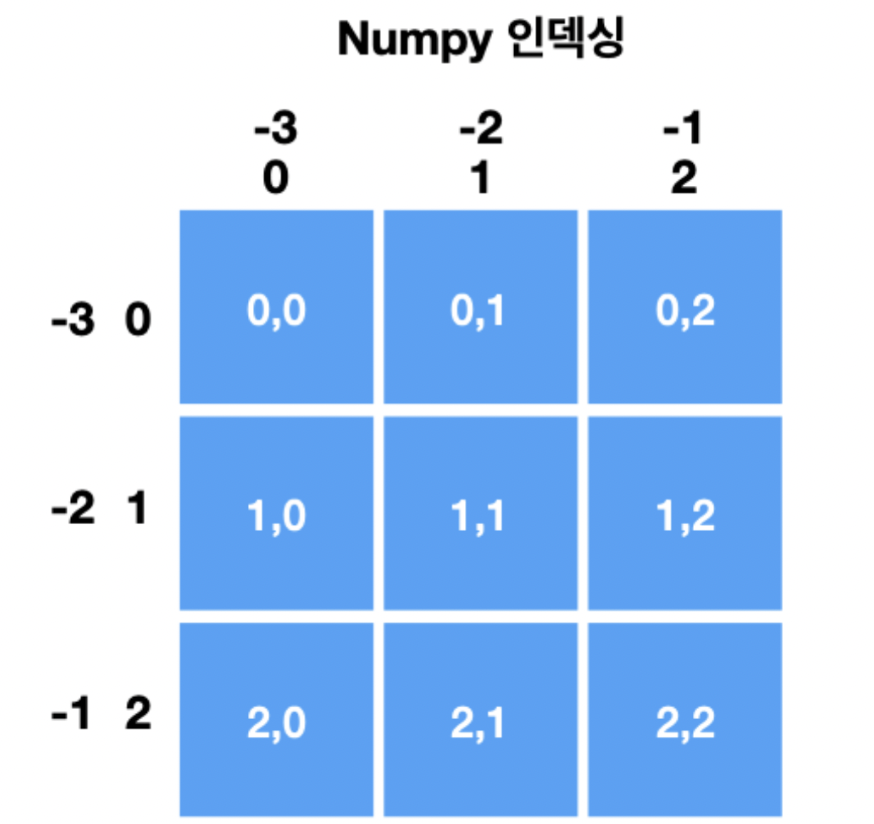

In [ ]:
# 3 X 3 행렬의 첫번째 행을 구해 봅시다.
A = np.arange(9).reshape(3,3)
print("A:", A)
B = A[0]
print("B:", B)

A: [[0 1 2]
 [3 4 5]
 [6 7 8]]
B: [0 1 2]


In [ ]:
# 0, 1을 인덱싱 하면 A의 첫번째 행에서 두번째 값을 참조합니다.
# 아래 두 결과는 정확히 같습니다.
print(A[0, 1])
print(B[1])

1
1


In [ ]:
# 슬라이싱도 비슷합니다.
A[:-1]

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
 # 이 슬라이싱의 결과는
print(A[:,2:])
print("--------------")
print(A[:,1:])
print("--------------")
print(A[:,:])
print("--------------")
# 이 슬라이싱의 결과와 동일합니다.
print(A[:,-1:])
print("--------------")
print(A[:,-2:])
print("--------------")
print(A[:,-3:])
# 위 그림과 비교해서 이해해 보세요.


[[2]
 [5]
 [8]]
--------------
[[1 2]
 [4 5]
 [7 8]]
--------------
[[0 1 2]
 [3 4 5]
 [6 7 8]]
--------------
[[2]
 [5]
 [8]]
--------------
[[1 2]
 [4 5]
 [7 8]]
--------------
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [ ]:
A[1,:2]

array([3, 4])

In [ ]:
A[:2, 1:]

array([[1, 2],
       [4, 5]])

In [ ]:
A[:,-1]

array([2, 5, 8])

### 7) random

>NumPy에서도 다양한 의사 난수를 지원합니다.

- np.random.randint()
- np.random.choice()
- np.random.permutation()
- np.random.normal()
- np.random.uniform()

In [ ]:
# 의사 난수를 생성하는 예제입니다. 여러번 실행해 보세요.
print(np.random.random()) # 0에서 1사이의 실수형 난수 하나를 생성합니다.
print(np.random.randint(0,10)) # 0~9 사이 1개 정수형 난수 하나를 생성합니다.
print(np.random.choice([0,1,2,3,4,5,6,7,8,9])) # 리스트에 주어진 값 중 하나를 랜덤하게 골라

0.7246388117556549
9
9


In [ ]:
# 무작위로 섞인 배열을 만들어 줍니다.
# 아래 2가지는 기능면에서 동일합니다.
print(np.random.permutation(10))
print(np.random.permutation([0,1,2,3,4,5,6,7,8,9]))

[5 8 2 7 1 0 9 6 4 3]
[1 4 0 5 2 9 3 8 7 6]


In [ ]:
# 아래 기능들은 어떤 분포를 따르는 변수를 임의로 표본추출해 줍니다.
# 이것은 정규분포를 따릅니다.
print(np.random.normal(loc=0, scale=1, size=5)) # 평균(loc), 표준편차(scale), 추출개수(s
# 이것은 균등분포를 따릅니다.
print(np.random.uniform(low=-1, high=1, size=5)) # 최소(low), 최대(high), 추출개수(size)를

[1.45013865 0.04315321 1.62629425 0.13929699 0.49603289]
[ 0.57757691 -0.03605397  0.88194231 -0.01550312  0.82706549]


### 8) 전치행렬

>행렬의 행과 열을 맞바꾸기, 행렬의 축을 서로 바꾸기 등에 사용되는 꼭 알아야 할 기능으로 아래와 같은 것들이 있습니다.

- arr.T : 행렬의 행과 열 맞바꾸기

- np.transpose : 축을 기준으로 행렬의 행과 열 바꾸기


In [ ]:
A = np.arange(24).reshape(2,3,4)
print("A:", A) # A는 (2,3,4)의 shape를 가진 행렬입니다.
print("A의 전치행렬:", A.T)
print("A의 전치행렬의 shape:", A.T.shape) # A의 전치행렬은 (4,3,2)의 shape를 가진 행렬입니다

A: [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
A의 전치행렬: [[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]
A의 전치행렬의 shape: (4, 3, 2)


In [ ]:
# np.transpose는 행렬의 축을 어떻게 변환해 줄지 임의로 지정해 줄 수 있는 일반적인 행렬 전치
# np.transpose(A, (2,1,0)) 은 A.T와 정확히 같습니다.
B = np.transpose(A, (2,0,1))
print("A:", A) # A는 (2,3,4)의 shape를 가진 행렬입니다.
print("B:", B) # B는 A의 3, 1, 2번째 축을 자신의 1, 2, 3번째 축으로 가진 행렬입니
print("B.shape:", B.shape) # B는 (4,2,3)의 shape를 가진 행렬입니다.

A: [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
B: [[[ 0  4  8]
  [12 16 20]]

 [[ 1  5  9]
  [13 17 21]]

 [[ 2  6 10]
  [14 18 22]]

 [[ 3  7 11]
  [15 19 23]]]
B.shape: (4, 2, 3)


# Numpy로 기본 통계 데이터 계산해보기

NumPy에서는 많은 통계 관련 수식을 함수로 제공해 줍니다. 

NumPy에서 제공하는 함수들을 이용해서 위에서 계산한 평균, 표준편차, 중앙값을 계산하면 아래와 같이 나타낼 수 있어요.

In [ ]:
import numpy as np

def numbers():
    X = []
    number = input("Enter a number (<Enter key> to quit)")
# 하지만 2개 이상의 숫자를 받아야 한다는 제약조건을 제외하였습니다.
    while number != "":
        try:
            x = float(number)
            X.append(x)
        except ValueError:
            print('>>> NOT a number! Ignored..')
        number = input("Enter a number (<Enter key> to quit)")
    return X

def main():
    nums = numbers() # 이것은 파이썬 리스트입니다.
    num = np.array(nums) # 리스트를 Numpy ndarray로 변환합니다.
    print("합", num.sum())
    print("평균값",num.mean())
    print("표준편차",num.std())
    print("중앙값",np.median(num)) # num.median() 이 아님에 유의해 주세요.

main()

Enter a number (<Enter key> to quit)1
Enter a number (<Enter key> to quit)2
Enter a number (<Enter key> to quit)2
Enter a number (<Enter key> to quit)
합 5.0
평균값 1.6666666666666667
표준편차 0.4714045207910317
중앙값 2.0


# 데이터의 행렬 변환

기본적인 수학 계산과 함께 영상, 이미지, 텍스트, 소리 등 다양한 형태의 데이터를 숫자, 혹은 행렬 형태로 표현하기도 합니다. 

컴퓨터는 0과 1의 2진수로 이루어진 산술 연산만 가능하기 때문에 복잡한 데이터를 숫자로 표현한 뒤 계산하기 때문이죠.

http://jalammar.github.io/visual-numpy/

**Q1. 소리 데이터의 경우 NumPy로 어떻게 표현하나요?**

>1차원 array로 표현한다. CD음원파일의 경우, 44.1kHz의 샘플링 레이트로 -32767 ~ 32768의 정수 값을 갖는다.

**Q2. 흑백 이미지의 경우 NumPy로 어떻게 표현 하나요?**

>이미지 사이즈의 세로X 가로 형태의 행렬(2차원 ndarray)로 나타내고, 각 원소는 픽셀별로 명도(grayscale)를 0~255 의 숫자로 환산하여 표시한다. 0은 검정, 255는 흰색이다.

**Q3. 컬러 이미지의 경우 NumPy로 어떻게 표현 하나요?**

>이미지 사이즈의 세로 X 가로x3 형태의 3차원 행렬이다. 3은 Red, Green, Blue계열의 3 색을 의미한다.

# 데이터의 행렬 변환 :이미지의 행렬 변환

**이미지 데이터를 어떻게
NumPy로 표현하는지 연습해보도록 하겠습니다.**

### 1) 픽셀과 이미지

>디지털로 표현되는 이미지는 수많은 점으로 구성되어 있습니다. 이 점들을 픽셀이라고 불러요.
아래 이미지는 동일한 사이즈의 이미지에 대해 픽셀이 1 X 1 (1개)일때 부터 100 X 100
(10,000개)일때 이미지의 해상도를 나타내고 있습니다.

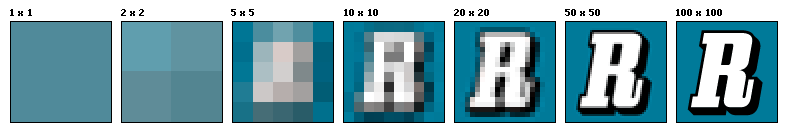

**이미지와 픽셀의 관계**

- 이미지는 수많은 점(픽셀)들로 구성되어 있습니다.

- 각각의 픽셀은 R, G, B 값 3개 요소의 튜플로 색상이 표시됩니다. (Red, Green, Blue의 값이에요)

   - 흰색(W) : (255,255,255)
   - 검정색(B) : (0, 0, 0)
   - 빨간색(R) : (255, 0, 0)
   - 파란색(B) : (0, 0, 255)
   - 녹색(G) : (0, 128, 0)
   - 노란색(Y) : (255, 255, 0)
   - 보라색(P) : (128, 0, 128)
   - 회색(Gray) : (128, 128, 128)

- 흑백의 경우에는 Gray 스케일로 나타내는데, 0~255 범위의 숫자 1개의 튜플 값이에요.

- Color는 투명도를 포함하는 A(alpha)를 포함해 RGBA 4개로 표시하기도 합니다.

- 아래 그림처럼 Image의 좌표는 보통 왼쪽 위를 (0, 0)으로 표시하고, 오른쪽과 아래로
내려갈수록 좌표가 증가합니다.

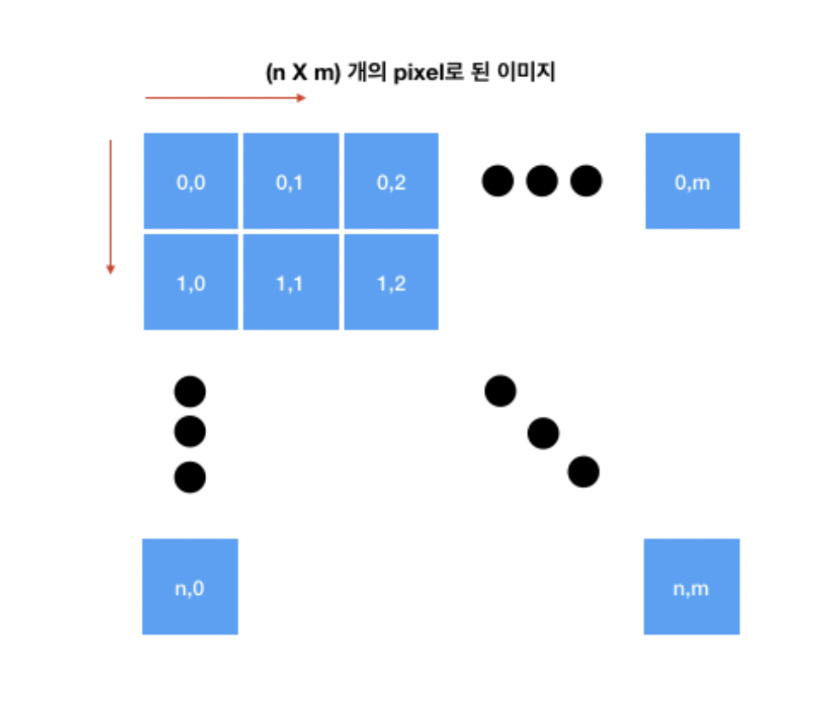

### 2) 이미지와 관련된 파이썬 라이브러리

- matplotlib

- PIL

<br>

이미지 데이터를 처리하기 위해 추가로 matplotlib과 PIL라이브러리를 이용할 거에요. 

이 두 라이브러리는 이미지파일을 열고, 자르고, 복사하고, rgb 색상값을 가져오는 등 이미지 파일과 관련된 몇 가지 작업을 수행합니다. 

이렇게 처리한 파일을 NumPy를 이용해 행렬로 빠르게 연산해서 이미지를 더 빠르게 작업하는 거에요.

In [ ]:
#이미지와 관련된 파이썬 라이브러리

import matplotlib as mpl
import PIL
print( f'# matplotlib: {mpl.__version__}' )
print(f'# PIL: {PIL.__version__}')


# matplotlib: 3.2.2
# PIL: 7.1.2


### 3)간단한 이미지 조작

이미지 조작에 쓰이는 메소드

- open : Image.open()
- size : Image.size
- filename : Image.filename
- crop : Image.crop((x0, y0, xt, yt))
- resize : Image.resize((w,h))
- save : Image.save()

https://aiffelstaticprd.blob.core.windows.net/media/documents/newyork.jpg

/content/newyork.jpeg
<class 'PIL.JpegImagePlugin.JpegImageFile'>


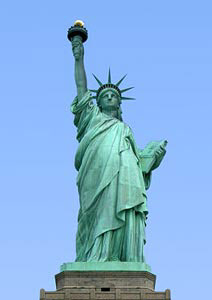

In [ ]:
#open
"""
Pillow의 Image.open()이라는 메소드를 통해 이미지 파일을 open하였습니다. 
이렇게 해서 얻어진 오브젝트 img는 PIL.JpegImagePlugin.JpegImageFile라는 타입을 가지고 있습니다.
"""
from PIL import Image, ImageColor
import os
img_path ="/content/newyork.jpeg"
img = Image.open(img_path)
print(img_path)
print(type(img))
img

In [ ]:
#size
img.size

(212, 300)

In [ ]:
"""
img.size를 입력하면 이미지 사이즈의 가로X세로가 각각 튜플 값으로 반환 됩니다. 
아래 코드처럼 많이 사용 해요.
"""
W, H = img.size
print((W, H))

(212, 300)


In [ ]:
#그밖에 이미지 파일의 타입과 색상 정보등을 확인 할 수 있습니다.
print(img.format)
print(img.size)
print(img.mode)

JPEG
(212, 300)
RGB


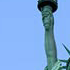

In [ ]:
#이미지 자르기

"""
이미지를 자를 때에는 .crop()메소드를 이용합니다. 인자로 튜플값을 받고, 가로 세로의
시작점과 가로,세로의 종료점 총 4개를 입력해 줍니다.
"""

img.crop((30,30,100,100))

In [ ]:
# 새로운 이미지 파일명
"""
자른 이미지를 저장해 보도록 하겠습니다. 저장은 .save()메소드를 사용하고, 매개변수로 파일
이름을 넣어 줍니다.
"""

cropped_img_path = "/content/cropped_img.jpg"
img.crop((30,30,100,100)).save(cropped_img_path)
print("저장 완료!")

저장 완료!


In [ ]:
#이미지가 잘 저장됐는지 확인해봅시다! 아래 명령어를 실행했을 때 이미지의 경로가 나오면 성공입니다.
!ls

cropped_img.jpg  newyork.jpeg  sample_data


### 행렬로 변환



img는 PIL.Image.Image 라는 랩퍼 클래스(Wrapper class)를 상속받은 타입을 가지고
있습니다. 

이 PIL.Image.Image 클래스는 리스트를 상속받지 않았지만 __array_interface__
라는 이 정의되어 있습니다. 

이 덕분에 Pillow 라이브러리는 손쉽게 이미지를 Numpy ndarray로 변환 가능합니다.

In [ ]:
#이미지 파일을 행렬로 변환해 보도록 하겠습니다.
import numpy as np
img_arr = np.array(img)
print(type(img))
print(type(img_arr))
print(img_arr.shape)
print(img_arr.ndim)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
(300, 212, 3)
3


컬러(RGB)이미지 파일이니, 변환된 행렬은 Height X Width X RGB Channel의 모양이고 차원 역시 3차원입니다.

In [ ]:
img_arr #행렬 값 확인

array([[[133, 180, 250],
        [133, 180, 250],
        [133, 180, 250],
        ...,
        [133, 180, 250],
        [133, 180, 250],
        [133, 180, 250]],

       [[133, 180, 250],
        [133, 180, 250],
        [133, 180, 250],
        ...,
        [133, 180, 250],
        [133, 180, 250],
        [133, 180, 250]],

       [[133, 180, 250],
        [133, 180, 250],
        [133, 180, 250],
        ...,
        [133, 180, 250],
        [133, 180, 250],
        [133, 180, 250]],

       ...,

       [[164, 199, 255],
        [164, 199, 255],
        [164, 199, 255],
        ...,
        [164, 199, 255],
        [164, 199, 255],
        [164, 199, 255]],

       [[164, 199, 255],
        [164, 199, 255],
        [164, 199, 255],
        ...,
        [164, 199, 255],
        [164, 199, 255],
        [164, 199, 255]],

       [[164, 199, 255],
        [164, 199, 255],
        [164, 199, 255],
        ...,
        [164, 199, 255],
        [164, 199, 255],
        [164, 199, 255]]

### 6)흑백 모드

파일을 열때 흑백모드로 사진을 열 수도 있습니다. 

Image.open().convert('L')로 모드를 조정할 수 있습니다.

https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes

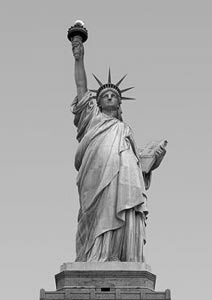

In [ ]:
img_g = Image.open(img_path).convert('L')
img_g

In [ ]:
img_g_arr = np.array(img_g)
print(type(img_g_arr))
print(img_g_arr.shape)
print(img_g_arr.ndim)

<class 'numpy.ndarray'>
(300, 212)
2


In [ ]:
#흑백이므로 반환된 행렬은 Height X Width , 차원은 2차원 입니다.
img_g_arr

array([[174, 174, 174, ..., 174, 174, 174],
       [174, 174, 174, ..., 174, 174, 174],
       [174, 174, 174, ..., 174, 174, 174],
       ...,
       [195, 195, 195, ..., 195, 195, 195],
       [195, 195, 195, ..., 195, 195, 195],
       [195, 195, 195, ..., 195, 195, 195]], dtype=uint8)

### 7)get color

>색상 값은 3개 원소의 튜플로, 각각의 원소는 R, G, B 값을 의미한다고 그랬죠? getcolor()는 각
색상이 RGB값으로 어떻게 표현되는지를 반환합니다.

In [ ]:
red = ImageColor.getcolor('RED','RGB')
reda = ImageColor.getcolor('red','RGBA')
yellow = ImageColor.getcolor('yellow','RGB')
print(red)
print(reda)
print(yellow)

(255, 0, 0)
(255, 0, 0, 255)
(255, 255, 0)


# 구조화된 데이터

그럼 이런 형태의 데이터는 어떨까요? 
국제전화 국가 번호 데이터를 저장한다고 해 볼게요.

Country_PhoneNumber

- Korea: 82
- America: 1
- Swiss: 41
- Italy: 39
- Japan: 81
- China: 86
- Rusia: 7

이렇게 어떤 데이터의 값을 찾을 때 인덱스가 아닌 "한국", "미국" 등의 키(key)를 사용해 데이터에 접근하는 데이터 구조를 해시(hash)라고 합니다.

<br>

Hash란 Key와 Value로 구성되어 있는 자료 구조로 두 개의 열만 갖지만 수많은 행을 가지는
구조체입니다.

In [ ]:
# 파이썬 dict 로 표현한 전화번호부입니다.
Country_PhoneNumber = {'Korea': 82, 'America': 1, 'Swiss': 41, 'Italy': 39, 'Japan': 81,
                        'China': 86, 'Rusia': 7}
Country_PhoneNumber['Korea'] # 키를 가지고 값을 조회할 수 있습니다.

82

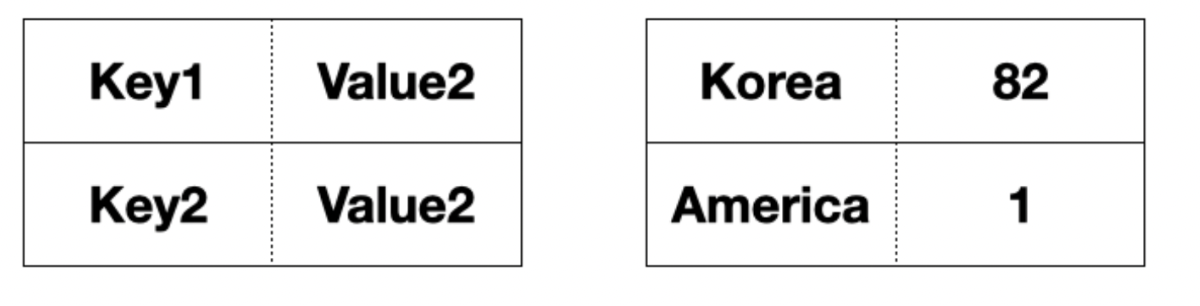

# 구조화된 데이터와 pandas(1) Series

>구조화된 데이터를 키(key)와 값(value)으로만 나타내기에는 너무 제한적이에요. 표 형태로 나타내는 것이 보기에도 편합니다. 

<br>

>구조화된 데이터를 효과적으로 표현하기 위해 pandas라는 파이썬 라이브러리는 와 이라는 자료 구조를 제공해요. 이 데이터 타입을 활용하면
구조화된 데이터를 더 쉽게 다룰 수 있습니다.

**Pandas**

- NumPy기반에서 개발되어 NumPy를 사용하는 애플리케이션에서 쉽게 사용 가능

- 축의 이름에 따라 데이터를 정렬할 수 있는 자료 구조

- 다양한 방식으로 인덱싱(indexing)하여 데이터를 다룰 수 있는 기능

- 통합된 시계열 기능과 시계열 데이터와 비시계열 데이터를 함께 다룰 수 있는 통합 자료 구조

- 누락된 데이터 처리 기능

- 데이터베이스처럼 데이터를 합치고 관계 연산을 수행하는 기능

### 1)Series

Series는 일련의 객체를 담을 수 있는, 1차원 배열과 비슷한 자료 구조입니다. 따라서 배열 형태인 리스트, 튜플, 딕셔너리를 통해서 만들거나 NumPy 자료형(정수형, 실수형 등)으로도 만들 수 있습니다.

In [ ]:
import pandas as pd
ser = pd.Series(['a','b','c',3])
ser

0    a
1    b
2    c
3    3
dtype: object

### 2)Series의 인덱스(index)

ser라는 Series객체를 만들었습니다.

pandas의 Series에는 index와 value가 있습니다. 

위에서 보면 index는 순서를 나타낸 숫자이고 value는 배열로 표현된 실제 데이터의 값입니다.

Series 객체의 values 를 호출하면 array 형태로 반환됨을 확인할 수 있습니다.

In [ ]:
ser.values

array(['a', 'b', 'c', 3], dtype=object)

In [ ]:
ser.index

RangeIndex(start=0, stop=4, step=1)

Series가 구조화된 데이터를 표현할 수 있는 이유는 인덱스에 다른 값을 넣을 수 있기 때문이에요.


Series 객체를 만들 때 인자로 넣어주거나 '='와 같은 할당 연산자(Assignment Operators)를
이용해서 인덱스의 값을 지정할 수 있어요.

### 3)인덱스 설정: Series의 인자로 넣어주는 방법

In [ ]:
ser2 = pd.Series(['a', 'b', 'c', 3], index=['i','j','k','h'])
ser2

i    a
j    b
k    c
h    3
dtype: object

### 4)인덱스 설정: 할당 연산자


In [ ]:
ser2.index = ['Jhon', 'Steve', 'Jack', 'Bob']
ser2

Jhon     a
Steve    b
Jack     c
Bob      3
dtype: object

index를 조회하면 방금 전 RangeIndex 가 아닌 Index 타입의 객체가 표시됩니다.

In [ ]:
ser2.index

Index(['Jhon', 'Steve', 'Jack', 'Bob'], dtype='object')

Series에서 인덱스는 기본적으로 정수 형태로 설정되고, 사용자가 원하면 값을 할당할 수 있습니다.


따라서 파이썬 딕셔너리 타입의 데이터를 Series 객체로 손쉽게 나타낼 수 있어요.

In [ ]:
Country_PhoneNumber = {'Korea': 82, 'America': 1, 'Swiss': 41, 'Italy': 39, 'Japan': 81}
ser3 = pd.Series(Country_PhoneNumber)
ser3

Korea      82
America     1
Swiss      41
Italy      39
Japan      81
dtype: int64

In [ ]:
ser3['Korea']

82

In [ ]:
ser3['Italy':]

Italy    39
Japan    81
dtype: int64

### 5)Series의 Name

Series 객체와 Series 인덱스는 모두 name속성이 있고, Pandas의 DataFrame에서 매우 중요한 부분입니다.

Series객체의 name속성을 이용해서 Series객체의 이름을 설정하고, Series인덱스의
name속성을 이용해 인덱스 이름을 설정했습니다.

사실 pandas의 DataFrame은 Series의 연속입니다. 

In [ ]:
ser3.name = 'Country_PhoneNumber'
ser3.index.name = 'Country_Name'
ser3

Country_Name
Korea      82
America     1
Swiss      41
Italy      39
Japan      81
Name: Country_PhoneNumber, dtype: int64

# Pandas DataFrame

**DataFrame**

DataFrame은 표(table)와 같은 자료 구조입니다. 

Series는 한 개의 인덱스 컬럼과 값 컬럼, 딕셔너리는 키 컬럼과 값 컬럼과 같이 2개의 컬럼만 존재하는데 비해, DataFrame은 여러 개의 컬럼을 나타낼 수 있습니다.

**Series로 변환**

In [ ]:
data = {'Region' : ['Korea', 'America', 'Chaina', 'Canada', 'Italy'],
'Sales' : [300, 200, 500, 150, 50],
'Amount' : [90, 80, 100, 30, 10],
'Employee' : [20, 10, 30, 5, 3]
}
s = pd.Series(data)
s


Region      [Korea, America, Chaina, Canada, Italy]
Sales                      [300, 200, 500, 150, 50]
Amount                        [90, 80, 100, 30, 10]
Employee                         [20, 10, 30, 5, 3]
dtype: object

**DataFrame 변환**

In [ ]:
d = pd.DataFrame(data)
d

,Region,Sales,Amount,Employee
0,Korea,300,90,20
1,America,200,80,10
2,Chaina,500,100,30
3,Canada,150,30,5
4,Italy,50,10,3


Series는 기본적으로 인덱스 외 한 개의 값 칼럼만을 가질 수 있고 그 칼럼의 데이터가 많더라도 배열 형태로 표현됩니다.

<br>

반면 DataFrame은 인덱스 칼럼 외에도 여러 개의 칼럼을 가질 수 있어요.
따라서 Index와 Column Index도 설정할 수 있습니다.

In [ ]:
d.columns

Index(['Region', 'Sales', 'Amount', 'Employee'], dtype='object')

In [ ]:
d.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
d.index=['one','two','three','four','five']
d.columns = ['a','b','c','d']
d

,a,b,c,d
one,Korea,300,90,20
two,America,200,80,10
three,Chaina,500,100,30
four,Canada,150,30,5
five,Italy,50,10,3


Series의 name은 DataFrame의
Column 명입니다.

**구조화된 데이터의 표현법**

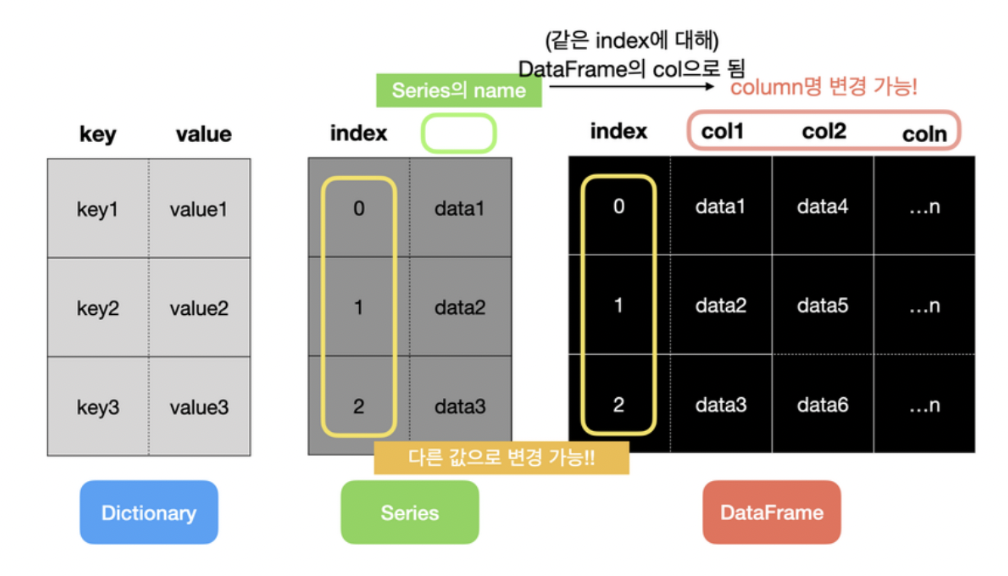

# pandas와 함께 EDA 시작하기


데이터 분석에 있어서 첫 번째 단계는 무엇일까요? 일단 데이터를 죽 훑어보는 것입니다. 

전문 용어로는 EDA(Exploratory Data Analysis), 우리말로는 '데이터를 탐색'한다고 표현합니다.


Pandas 라이브러리는 수학 메서드와 통계 메서드를 기본적으로 가지고 있습니다. 


통계 데이터를 활용해서 데이터의 대푯값과 분산을 구하는 것은 EDA의 기본이라고 할 수 있습니다.


이번에는 이탈리아 코로나바이러스 현황 데이터를 가지고 간단한 EDA를 연습해 보겠습니다.

https://www.kaggle.com/sudalairajkumar/covid19-in-italy

In [ ]:
#CSV 파일 읽기

"""
csv파일을 DataFrame 객체로 읽습니다.

type() 으로 확인해 보면 자료형은 DataFrame이네요.
"""

import pandas as pd
import os
csv_path ="/content/covid19_italy_region.csv"
data = pd.read_csv(csv_path)
type(data)

pandas.core.frame.DataFrame

**head(),tail()**

In [ ]:
data

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,793,2020-04-01T17:00:00,ITA,9,Toscana,43.769231,11.255889,1120,297,1417,3015,4432,259,182,253,4867,36575
794,794,2020-04-01T17:00:00,ITA,4,P.A. Trento,46.068935,11.121231,345,76,421,1062,1483,124,214,173,1870,7675
795,795,2020-04-01T17:00:00,ITA,10,Umbria,43.106758,12.388247,173,45,218,646,864,17,194,37,1095,9080
796,796,2020-04-01T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,85,27,112,428,540,3,32,59,631,1717


In [ ]:
data.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


In [ ]:
data.tail()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
793,793,2020-04-01T17:00:00,ITA,9,Toscana,43.769231,11.255889,1120,297,1417,3015,4432,259,182,253,4867,36575
794,794,2020-04-01T17:00:00,ITA,4,P.A. Trento,46.068935,11.121231,345,76,421,1062,1483,124,214,173,1870,7675
795,795,2020-04-01T17:00:00,ITA,10,Umbria,43.106758,12.388247,173,45,218,646,864,17,194,37,1095,9080
796,796,2020-04-01T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,85,27,112,428,540,3,32,59,631,1717
797,797,2020-04-01T17:00:00,ITA,5,Veneto,45.434905,12.338452,1718,350,2068,6156,8224,470,902,499,9625,112746


In [ ]:
#.columns

"""
데이터셋의 서브 구조를 이루는 항목엔 어떤 게 있을까요? .columns을 이용해서 데이터셋에 존재하는
컬럼명을 확인해봅시다.
"""
data.columns

Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

In [ ]:
#.info() 는 각 컬럼별로 Null값과 자료형을 보여주는 메소드입니다. 실행해보세요.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SNo                        798 non-null    int64  
 1   Date                       798 non-null    object 
 2   Country                    798 non-null    object 
 3   RegionCode                 798 non-null    int64  
 4   RegionName                 798 non-null    object 
 5   Latitude                   798 non-null    float64
 6   Longitude                  798 non-null    float64
 7   HospitalizedPatients       798 non-null    int64  
 8   IntensiveCarePatients      798 non-null    int64  
 9   TotalHospitalizedPatients  798 non-null    int64  
 10  HomeConfinement            798 non-null    int64  
 11  CurrentPositiveCases       798 non-null    int64  
 12  NewPositiveCases           798 non-null    int64  
 13  Recovered                  798 non-null    int64  

이전 스텝에서 학습했던 기본적 통계 데이터(평균, 표준편차 등)를 pandas에서 손쉽게 보고 싶으면
.describe()을 이용하면 됩니다. 

.describe()은 각 컬럼별로 기본 통계 데이터를 보여주는 메소드에요.


개수(Count), 평균(mean), 표준편차(std), 최솟값(min), 4분위수(25%, 50%, 75%), 최댓값(max)를
보여 줍니다.
.describe()

In [ ]:

data.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,798.00000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,398.50000,10.190476,43.046293,12.225955,533.058897,82.596491,615.655388,674.998747,1290.654135,138.553885,205.706767,162.677945,1659.038847,7932.164160
std,230.50705,5.798698,2.490342,2.660615,1532.090841,190.735985,1719.508711,1627.086600,3282.834715,327.616052,1060.433732,700.264327,4945.629053,17067.087279
min,0.00000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,0.000000,0.000000,0.000000,0.000000
25%,199.25000,5.000000,41.125596,11.121231,5.000000,0.000000,6.000000,8.000000,14.250000,2.000000,0.000000,0.000000,14.250000,230.000000
50%,398.50000,10.000000,43.616760,12.388247,64.000000,16.000000,80.500000,109.000000,205.000000,32.000000,3.000000,6.000000,210.500000,1610.000000
75%,597.75000,15.000000,45.434905,13.768136,325.750000,71.750000,396.250000,552.750000,998.750000,117.750000,34.000000,55.750000,1110.750000,7493.000000
max,797.00000,20.000000,46.499335,16.867367,11927.000000,1342.000000,13269.000000,12496.000000,25765.000000,3251.000000,11415.000000,7593.000000,44773.000000,121449.000000


데이터를 분석할 때, 결측값(Missing value) 확인은 정말 중요해요. 

pandas에서 missing 데이터를 isnull() 로 확인하고, sum() 메소드를 활용해서 missing 데이터 개수의 총합을 구할 수 있습니다.

In [ ]:
data.isnull().sum()

SNo                          0
Date                         0
Country                      0
RegionCode                   0
RegionName                   0
Latitude                     0
Longitude                    0
HospitalizedPatients         0
IntensiveCarePatients        0
TotalHospitalizedPatients    0
HomeConfinement              0
CurrentPositiveCases         0
NewPositiveCases             0
Recovered                    0
Deaths                       0
TotalPositiveCases           0
TestsPerformed               0
dtype: int64


### EDA - 통계

pandas는 기본 수학 메서드와 통계 메서드를 가지고 있다고 했습니다. 

앞서 describe()를 통해 기본 통계 기능을 확인할 수 있었어요. 

pandas에서 제공하는 풍부한 통계 기능을 활용해서 데이터를 더 자세히 탐색해 보겠습니다.


범주형 데이터로 기재되는 컬럼에 대해서는 value_counts()메소드를 사용해 각 범주(Case
또는Category)별로 값이 몇 개 있는지 구할 수 있어요. 

코로나 데이터에서 범주형 데이터가 사용되는
컬럼에는 Country, RegionCode, RegionName이 있는것 같습니다.

In [ ]:
data['RegionName'].value_counts()

Abruzzo                  38
Molise                   38
Valle d'Aosta            38
Umbria                   38
P.A. Trento              38
Toscana                  38
Sicilia                  38
Sardegna                 38
Puglia                   38
Piemonte                 38
Marche                   38
Basilicata               38
Lombardia                38
Liguria                  38
Lazio                    38
Friuli Venezia Giulia    38
Emilia-Romagna           38
Campania                 38
Calabria                 38
P.A. Bolzano             38
Veneto                   38
Name: RegionName, dtype: int64

In [ ]:
data['Country'].value_counts()

ITA    798
Name: Country, dtype: int64

sum() 메소드를 추가해서 컬럼별 통계 수치의 합을 확인할 수 있습니다.

In [ ]:
data['RegionName'].value_counts().sum()

798

In [ ]:
data['Country'].value_counts().sum()

798

In [ ]:
"""
이어서 sum()메소드를 연습해 볼게요.  sum()을 컬럼에 단독으로 적용해서 해당 컬럼 값의 총합을
구할 수 있습니다.

sum() 메소드로 총감염자, 전체 검사자수, 사망자수, 회복자수의 합을 각각 구해봅시다.

"""
print("총감염자" ,data['TotalPositiveCases'].sum())
print( "총감염자" , data['TotalPositiveCases' ].sum())
print("전체 검사자수", data['TestsPerformed'].sum())
print("사망자수", data['Deaths'].sum())
print("회복자수", data['Recovered'].sum())

총감염자 1323913
총감염자 1323913
전체 검사자수 6329867
사망자수 129817
회복자수 164154


In [ ]:
data.sum()

SNo                                                                     318003
Date                         2020-02-24T18:00:002020-02-24T18:00:002020-02-...
Country                      ITAITAITAITAITAITAITAITAITAITAITAITAITAITAITAI...
RegionCode                                                                8132
RegionName                   AbruzzoBasilicataP.A. BolzanoCalabriaCampaniaE...
Latitude                                                          34350.941591
Longitude                                                          9756.312476
HospitalizedPatients                                                    425381
IntensiveCarePatients                                                    65912
TotalHospitalizedPatients                                               491293
HomeConfinement                                                         538649
CurrentPositiveCases                                                   1029942
NewPositiveCases                                    

상관관계는 2개의 매개변수가 필요합니다. 두 컬럼 내 데이터가 얼마만큼의 상관관계가 있는지를
나타내는 것이니까요.


예를 들어 폐암과 사망률의 상관관계는 폐암에 걸린 사람 중 사망자를 조사하면 되겠죠. 

반대로 사망률과 폐암과의 상관관계는 사망자 중 폐암에 걸린 사람의 데이터를 확인해 보면 됩니다.


하지만 data.corr()를 통해 모든 컬럼이 다른 컬럼 사이에 가지는 상관관계를 일목요연하게 확인해 볼 수 있습니다.

In [ ]:
print(data['TestsPerformed'].corr(data['TotalPositiveCases']))
print(data['TestsPerformed'].corr(data['Deaths']))
print(data['TotalPositiveCases'].corr(data['Deaths']))
data.corr()

0.8555291657820235
0.7612209669865387
0.975268668316802


,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
SNo,1.000000,-0.006385,0.004550,-0.009905,0.304934,0.356195,0.311208,0.424331,0.373320,0.290469,0.206334,0.251302,0.327629,0.427816
RegionCode,-0.006385,1.000000,-0.959568,0.652820,-0.288057,-0.321805,-0.292356,-0.275990,-0.289923,-0.316658,-0.205056,-0.218793,-0.267394,-0.271954
Latitude,0.004550,-0.959568,1.000000,-0.547164,0.232802,0.262618,0.236559,0.246010,0.245838,0.264146,0.168196,0.181795,0.224989,0.244442
Longitude,-0.009905,0.652820,-0.547164,1.000000,-0.259902,-0.279147,-0.262538,-0.208338,-0.240774,-0.270345,-0.180529,-0.197115,-0.226441,-0.158840
HospitalizedPatients,0.304934,-0.288057,0.232802,-0.259902,1.000000,0.980457,0.999762,0.923389,0.981327,0.912586,0.923919,0.944874,0.983282,0.809607
IntensiveCarePatients,0.356195,-0.321805,0.262618,-0.279147,0.980457,1.000000,0.984517,0.916971,0.970160,0.930570,0.876121,0.892060,0.958143,0.840098
TotalHospitalizedPatients,0.311208,-0.292356,0.236559,-0.262538,0.999762,0.984517,1.000000,0.924459,0.981982,0.916342,0.920400,0.940839,0.982391,0.814551
HomeConfinement,0.424331,-0.275990,0.246010,-0.208338,0.923389,0.916971,0.924459,1.000000,0.979855,0.831487,0.850907,0.896904,0.959858,0.928523
CurrentPositiveCases,0.373320,-0.289923,0.245838,-0.240774,0.981327,0.970160,0.981982,0.979855,1.000000,0.892083,0.903833,0.937337,0.990303,0.886860
NewPositiveCases,0.290469,-0.316658,0.264146,-0.270345,0.912586,0.930570,0.916342,0.831487,0.892083,1.000000,0.760710,0.775184,0.865022,0.755386


In [ ]:
"""
위와 같은 분석 작업을 통해 양성 판정 건수와 사망건수를 제외한 
Country, Date, SNo, HospitalizedPatients, RegionCode, Longitude, Latitude 
등의 컬럼을 삭제하기로 하였습니다.
"""
data.drop(['Latitude','Longitude','Country','Date','HospitalizedPatients'],axis=1)
data.corr()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
SNo,1.000000,-0.006385,0.004550,-0.009905,0.304934,0.356195,0.311208,0.424331,0.373320,0.290469,0.206334,0.251302,0.327629,0.427816
RegionCode,-0.006385,1.000000,-0.959568,0.652820,-0.288057,-0.321805,-0.292356,-0.275990,-0.289923,-0.316658,-0.205056,-0.218793,-0.267394,-0.271954
Latitude,0.004550,-0.959568,1.000000,-0.547164,0.232802,0.262618,0.236559,0.246010,0.245838,0.264146,0.168196,0.181795,0.224989,0.244442
Longitude,-0.009905,0.652820,-0.547164,1.000000,-0.259902,-0.279147,-0.262538,-0.208338,-0.240774,-0.270345,-0.180529,-0.197115,-0.226441,-0.158840
HospitalizedPatients,0.304934,-0.288057,0.232802,-0.259902,1.000000,0.980457,0.999762,0.923389,0.981327,0.912586,0.923919,0.944874,0.983282,0.809607
IntensiveCarePatients,0.356195,-0.321805,0.262618,-0.279147,0.980457,1.000000,0.984517,0.916971,0.970160,0.930570,0.876121,0.892060,0.958143,0.840098
TotalHospitalizedPatients,0.311208,-0.292356,0.236559,-0.262538,0.999762,0.984517,1.000000,0.924459,0.981982,0.916342,0.920400,0.940839,0.982391,0.814551
HomeConfinement,0.424331,-0.275990,0.246010,-0.208338,0.923389,0.916971,0.924459,1.000000,0.979855,0.831487,0.850907,0.896904,0.959858,0.928523
CurrentPositiveCases,0.373320,-0.289923,0.245838,-0.240774,0.981327,0.970160,0.981982,0.979855,1.000000,0.892083,0.903833,0.937337,0.990303,0.886860
NewPositiveCases,0.290469,-0.316658,0.264146,-0.270345,0.912586,0.930570,0.916342,0.831487,0.892083,1.000000,0.760710,0.775184,0.865022,0.755386


# pandas 통계 관련 메소드

- count() : NA를 제외한 수를 반환합니다.
- describe() : 요약통계를 계산합니다.
- min(), max() : 최소, 최댓값을 계산합니다.
- sum() : 합을 계산합니다.
- mean() : 평균을 계산합니다.
- median() : 중앙값을 계산합니다.
- var() : 분산을 계산합니다.
- std() : 표준편차를 계산합니다.
- argmin() , argmax() : 최소, 최댓값을 가지고 있는 값을 반환 합니다.
- idxmin() , idxmax() : 최소, 최댓값을 가지고 있는 인덱스를 반환합니다.
- cumsum() : 누적 합을 계산합니다.
- pct_change() : 퍼센트 변화율을 계산합니다.